In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from dataset import CLIPDataset, get_transforms
from pathlib import Path
import torchio as tio

/home/gridsan/nchutisilp/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pre_final_coregistration = Path('/home/gridsan/nchutisilp/datasets/Mariia/Pre_Final')

In [4]:
image_filenames1 = pre_final_coregistration.glob('*Pre_target_Final.nii.gz')
image_filenames1 = list(image_filenames1)
image_filenames2 = pre_final_coregistration.glob('*Final_reg.nii.gz')
image_filenames2 = list(image_filenames2)
dataset = CLIPDataset(image_filenames1, image_filenames2, get_transforms())
for data in dataset:
    break

In [4]:
from main import make_train_valid_dfs, build_loaders
train_dataframe, valid_dataframe = make_train_valid_dfs()
valid_loader = build_loaders(valid_dataframe, mode='valid')
for data in valid_loader:
    break

In [10]:
data['image1'][tio.DATA].shape

torch.Size([16, 1, 512, 512, 32])

In [7]:
for image_path1, image_path2 in zip(dataset.image_filenames1, dataset.image_filenames2):
    assert str(image_path1)[:6] == str(image_path2)[:6], f'Image paths do not align'

In [8]:
import os
os.environ['WANDB_MODE'] = 'offline'

In [9]:
from nnunetv2.run.run_training import get_trainer_from_args
import torch
"""
nnUNet:
  dataset_name_or_id: "301"
  configuration: 3d_fullres
  trainer_name: nnUNetTrainer
  plans_identifier: nnUNetPlans
  fold: 0 # any fold would do
"""
trainer = get_trainer_from_args(
    dataset_name_or_id='302',
    configuration='3d_32x512x512_b2',
    fold=0,
    trainer_name='nnUNetTrainer',
    plans_identifier='nnUNetPlans',
    device=torch.device('cpu'))
trainer.initialize()

Using device: cpu


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################



/home/gridsan/nchutisilp/.local/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [10]:
train_dl, val_dl = trainer.get_dataloaders()

2024-07-30 15:46:07.123445: do_dummy_2d_data_aug: True
2024-07-30 15:46:07.126371: Using splits from existing split file: /home/gridsan/nchutisilp/datasets/nnUNet_Datasets/nnUNet_preprocessed/Dataset302_Calcium_OCTv2/splits_final.json
2024-07-30 15:46:07.142995: The split file contains 3 splits.
2024-07-30 15:46:07.144217: Desired fold for training: 0
2024-07-30 15:46:07.145184: This split has 4 training and 2 validation cases.


In [11]:
for nnunet_data in train_dl:
    break

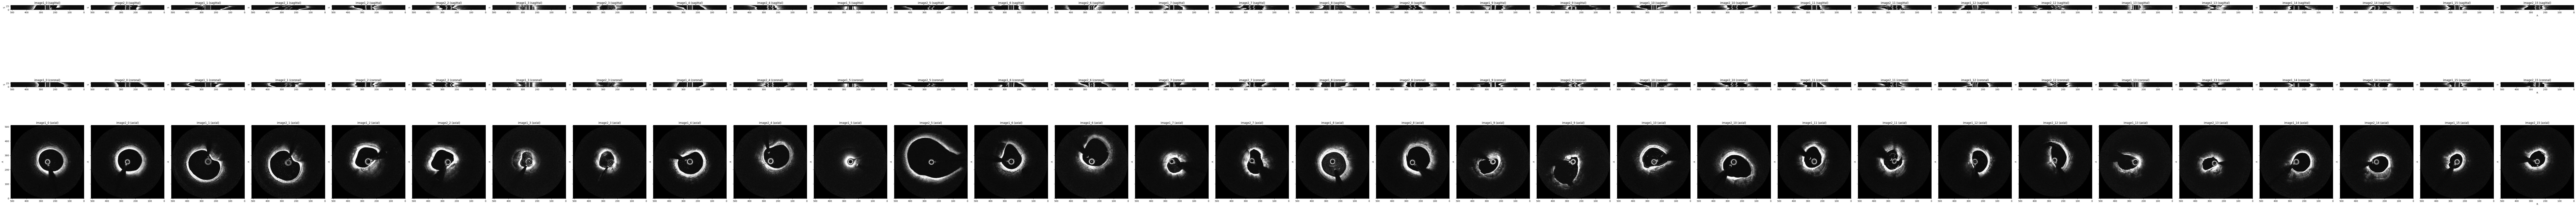

In [24]:
%matplotlib inline

subjects = dict()
for batch_idx in range(data['image1'][tio.DATA].shape[0]):
    subjects[f'image1_{batch_idx}'] = tio.ScalarImage(tensor=data["image1"][tio.DATA][batch_idx])
    subjects[f'image2_{batch_idx}'] = tio.ScalarImage(tensor=data["image2"][tio.DATA][batch_idx])

tio.Subject(
    **subjects
).plot(figsize=((batch_idx + 1) * 10, 20), output_path=f"pre-ivl_post-ivl_subjects.png")

In [17]:
nnunet_data['data'][0].shape

torch.Size([1, 32, 512, 512])

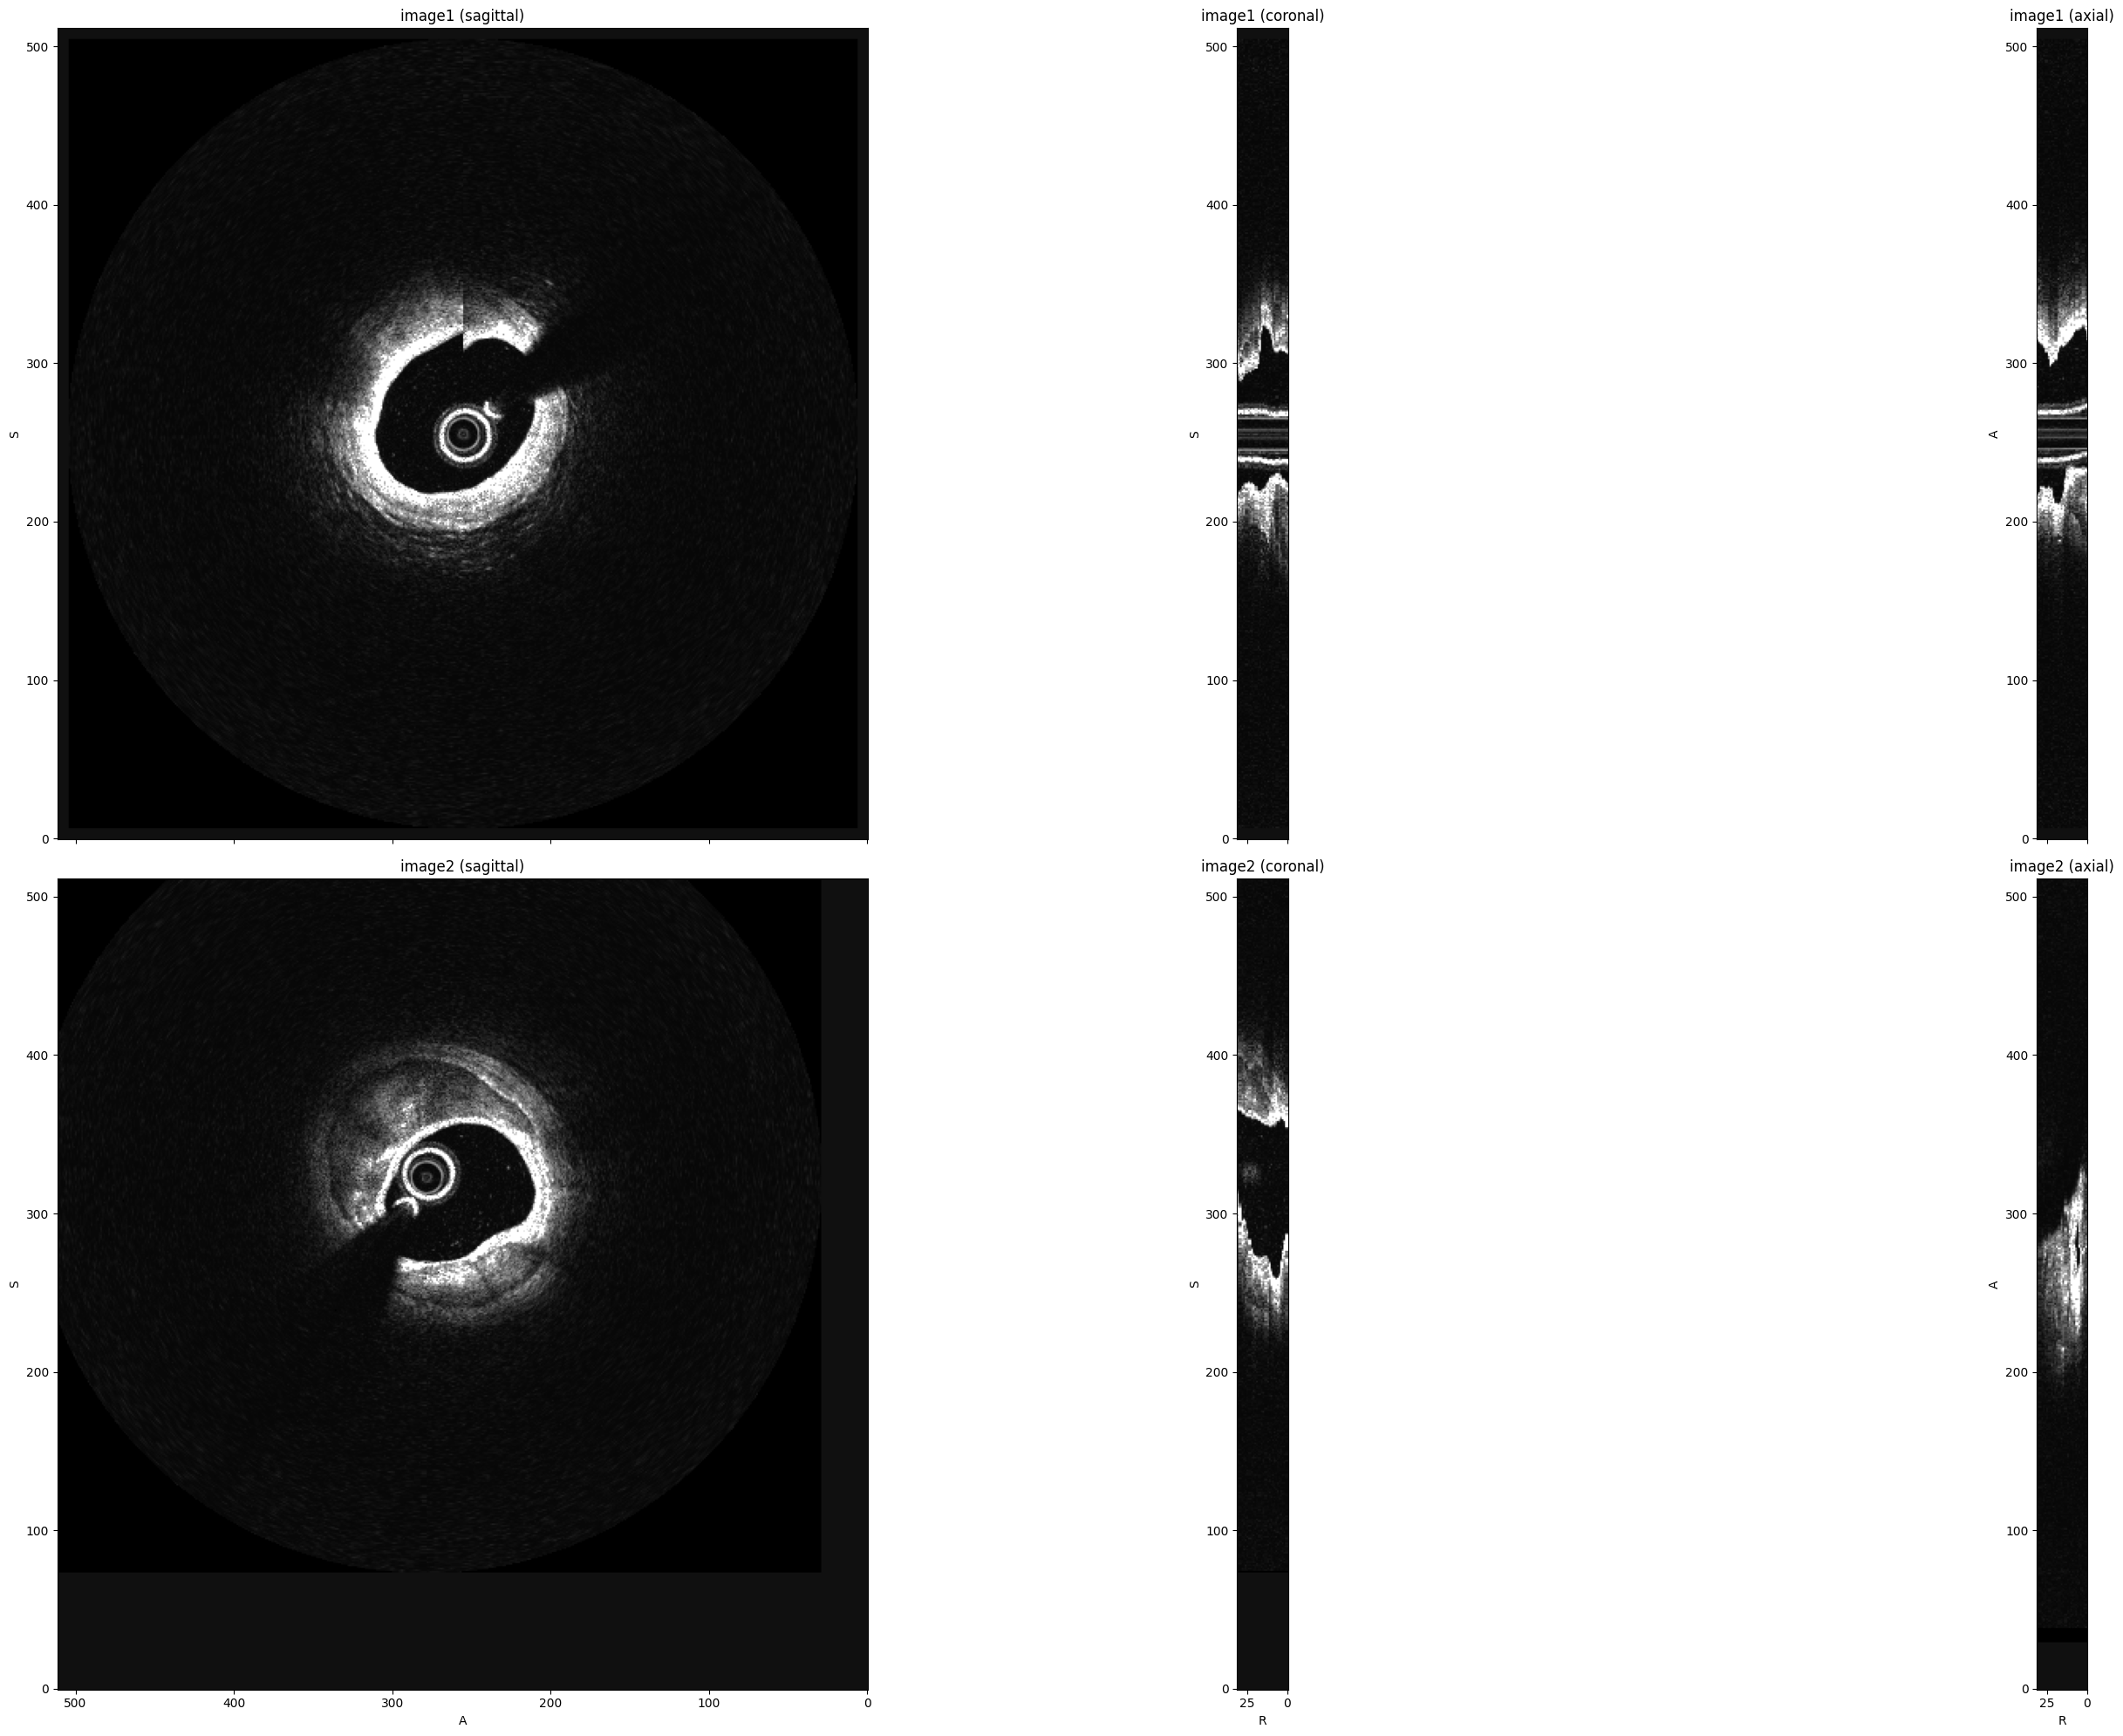

In [18]:
nnunet_data['data'], nnunet_data['target']
tio.Subject(
    image1=tio.ScalarImage(tensor=nnunet_data['data'][0]),
    image2=tio.ScalarImage(tensor=nnunet_data['data'][1])
).plot(figsize=(40,20))


In [19]:
nnunet_data['data'][0].mean(), nnunet_data['data'][0].std(), nnunet_data['data'][0].max(), nnunet_data['data'][0].min()

(tensor(-0.0228), tensor(0.8083), tensor(6.1505), tensor(-0.4187))

In [20]:
data['image1'].mean(), data['image1'].std(), data['image1'].max(), data['image1'].min()

(tensor(4.8312e-08), tensor(1.0000), tensor(8.6873), tensor(-0.5924))

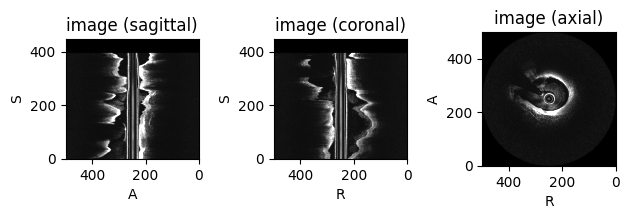

In [24]:
nib_subject = tio.Subject(
    image=tio.ScalarImage(image_filenames1[0]),
)
nib_subject.plot()

In [25]:
nib_subject.shape

(1, 500, 500, 448)